In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import torch
from torch import nn, optim

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [2]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.sin(x)
# plt.plot(x, y, label="Ground Truth")

In [3]:
X = np.expand_dims(x, axis=1)
Y = y.reshape(400, -1)

In [4]:
# 按照网上的说法加了个dataloader，感觉对于这个训练集的大小有点没必要
dataset = TensorDataset(torch.tensor(X, dtype=torch.float), torch.tensor(Y, dtype=torch.float))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [5]:
class MyNet(nn.Module):
    def __init__(self, dim):
        super(MyNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, 8 * dim), nn.ReLU(),
            nn.Linear(8 * dim, 64 * dim), nn.ReLU(),
            nn.Linear(64 * dim, 8 * dim), nn.ReLU(),
            nn.Linear(8 * dim, dim)
        )

    def forward(self, x): # x:torch.FloatTensor
        return self.net(x)

In [6]:
model = MyNet(1)
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
epochs = 10000
losses = []
for i in range(epochs):
    for x_batch, y_batch in dataloader:
        y_pred = model.forward(x_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (i + 1) % (epochs / 10) == 0:
        print("epoch: {0} , loss: {1}".format(i + 1, loss.item()))

epoch: 1000 , loss: 0.0010538621572777629
epoch: 2000 , loss: 0.0003947708464693278
epoch: 3000 , loss: 2.269869582960382e-05
epoch: 4000 , loss: 3.657445631688461e-05
epoch: 5000 , loss: 4.3923737393924966e-05
epoch: 6000 , loss: 2.5224697310477495e-05
epoch: 7000 , loss: 0.00011131730570923537
epoch: 8000 , loss: 0.00013819448940921575
epoch: 9000 , loss: 7.503054803237319e-05
epoch: 10000 , loss: 8.321450877701864e-05


In [8]:
def testplot(x_test):
    X_test = torch.tensor(x_test, dtype=torch.float)
    Y_test = model.forward(X_test)
    plt.plot(x_test, np.sin(x_test), label="Ground Truth")
    plt.plot(x_test, Y_test.detach().numpy(), label="Predict")
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    plt.legend()
    # plt.savefig(fname="save.png", figsize=[10,10])
    plt.show()

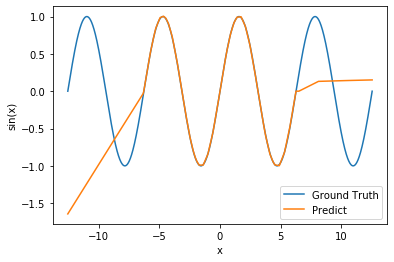

In [9]:
x_test = np.linspace(- 4 * np.pi, 4 * np.pi, 1600)
X_test = np.expand_dims(x_test, axis=1)
testplot(X_test)